# Fitting nonlinear functions: polynomial regression and kernel ridge regression

## Fitting polynomials using least squares
Thus far in this course, we have used the term linear regression to mean "fitting a line to data". In this section, we will see that linear regression can actually be used as a general method to fit functions which are _nonlinear_ functions of the data. In particular, in this section, we will focus on the task of fitting polynomials to data.

To see how this is done, suppose we would like to fit a $p$th order polynomial of the form

$$
f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_p x^p \hspace{10mm} (1)
$$

to some observed data $(x, y)$. Then define the vectors 

$$
\boldsymbol{z}_p(x) = \begin{bmatrix} 1 \\ x \\ x^2 \\\vdots \\ x^p\end{bmatrix}\in\mathbb{R}^{p+1},\;\;\; \boldsymbol{\beta}=\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\\vdots \\ \beta_p\end{bmatrix} \in \mathbb{R}^{p+1}
$$

and observe that the model $(1)$ can be equivalently expressed as

$$
f(x) = \boldsymbol{z}_p(x)\cdot \boldsymbol{\beta}.
$$

Given some data $(x_1,y_1),\dots,(x_n,y_n)$ that we'd like to fit this model, we could define the usual least squares objective as 

$$
\sum_{i=1}^n (y_i - \boldsymbol{z}_p(x_i)\cdot \boldsymbol{\beta})^2 = \|\boldsymbol{y} - \boldsymbol{X}_p \boldsymbol{\beta}\|_2^2
$$

where we've defined the matrix 

$$
\boldsymbol{X}_p = \begin{bmatrix}\boldsymbol{z}_p(x_1)\\ \vdots \\ \boldsymbol{z}_p(x_1)\end{bmatrix} = \begin{bmatrix} 1 & x_1 & x_1^2 & \cdots & x_1^p\\ \vdots & \vdots & \vdots &\vdots & \vdots \\ \vdots & \vdots & \vdots &\vdots & \vdots \\ 1 & x_n & x_n^2 & \cdots & x_n^p\end{bmatrix}
$$

Our problem now looks identical to our usual least squares problem, and we can get the usual solution: $\hat{\boldsymbol{\beta}} = (\boldsymbol{X}_p^\top \boldsymbol{X}_p)^{-1}\boldsymbol{X}_p^\top \boldsymbol{y}$. Indeed, in this model, each power $x^j$ just acts like an additional feature in our model. These coefficients can be plugged back in to get a fitted $p$th order polynomial:

$$
\hat{f}(x) = \hat{\beta}_0 + \hat{\beta}_1 x + \hat{\beta}_2 x^2 + \cdots + \hat{\beta}_p x^p.
$$

This is distinctly _not_ a linear function of the data. The important thing for making the usual least squares problem appear is that it is a linear function of the _parameters_ (i.e. the function $f_{\boldsymbol{\beta}}(x) = \boldsymbol{z}_p(x)\cdot \boldsymbol{\beta}$ is a linear function of $\boldsymbol{\beta}$). Let's see an example to illustrate how this works. First, let's generate some fake data coming from the "true" regression function $f_\star(x) = 4x + 3\cos(2\pi x)$, where $x$ is drawn uniformly at random from $[-1,1]$ and 

$$
y = f_\star(x) + \varepsilon.
$$

We do this in the following cell.

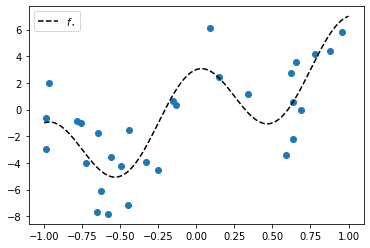

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

f_star = lambda x: 4*x + 3*np.cos(2*np.pi*x)

n = 30
x = np.random.uniform(-1,1,size=n)
x_test = np.linspace(-1,1,1000)
y = f_star(x) + 2*np.random.normal(size=n)

plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.legend()
plt.show()

To generate the polynomial feature matrix $\boldsymbol{X}_p$, we define the following function.

In [2]:
def polynomial_features(x, p):
    x = x.reshape(-1,1)
    return np.hstack([x**j for j in range(p+1)])

Now let's try fitting a polynomial to our data.

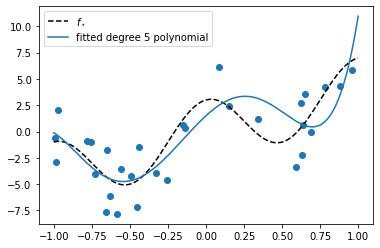

In [3]:
p = 5 # use an order 5 polynomial 
Xp = polynomial_features(x, p=p) # generate feature matrix
beta_hat = np.linalg.inv(Xp.T@Xp)@Xp.T@y # get OLS coefficients

# make predictions on test samples to compare the fitted function
Xp_test = polynomial_features(x_test, p=p)
y_hat_test = Xp_test@beta_hat

plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.plot(x_test, y_hat_test, label="fitted degree 5 polynomial")
plt.legend()
plt.show()

As we can see, our fitted model does a pretty reasonable job of approximating the true regression function $f_\star$. Of course, in this example, we simply picked $p=5$ as the degree of the polynomial somewhat arbitrarily. Let's see what happens when we try different values.

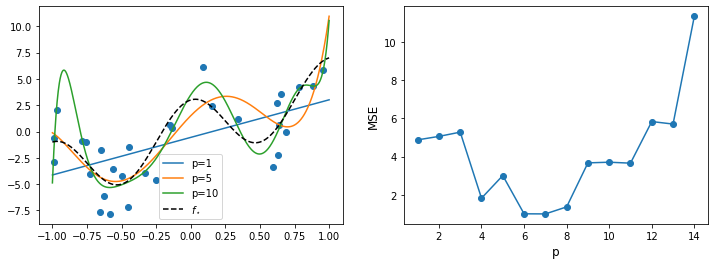

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
p_range = range(1,15,1) 

mses = []
for p in p_range:
    Xp = polynomial_features(x, p=p) # generate feature matrix
    beta_hat = np.linalg.inv(Xp.T@Xp)@Xp.T@y # get OLS coefficients

    # make predictions on test samples to compare the fitted function
    Xp_test = polynomial_features(x_test, p=p)
    y_hat_test = Xp_test@beta_hat
    mses.append(np.mean((y_hat_test - f_star(x_test))**2))
    if p in [1,5,10,15,20]:
        axs[0].plot(x_test, y_hat_test, label=f"p={p}")

axs[0].scatter(x, y)
axs[0].plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
axs[0].legend()

axs[1].plot(p_range, mses, marker='o')
axs[1].set_xlabel("p", fontsize=12)
axs[1].set_ylabel("MSE", fontsize=12)
plt.show()

On the left plot, we see examples of fitted polynomials of different degrees. As you might expect, the models get more complicated as the degree $p$ gets larger. In the plot on the right, we plot the error (MSE) between the fitted values $\hat{f}_p(x)$ of the degree $p$ model against the true function values $f_\star(x)$. We see that the performance first gets better as we increase $p$, as the model becomes sufficiently expressive to fit the data, but that performance degrades for too large of $p$ as the models become too complex and overfit. For this example, the best value of $p$ appears to be $p=7$ or $p=8$. Of course, in practice we do not have access to $f_\star$, and so we couldn't use this method to pick $p$. Instead, we could use a method like cross validation to pick the best value. However, shortly we will see a different approach: we could choose $p$ to be very large, and then use _regularization_ to find a simpler model.

Let's consider the situation when $p$ is fixed to be an integer larger than $n$. In this case, the inverse $(\boldsymbol{X^\top X})^{-1}$ does not exist, and so we need to use something other than the standard least squares solution. A natural choice would be the Ridge regression solution, which is given by

$$
\hat{\boldsymbol{\beta}}_{RR}(\lambda) = (\boldsymbol{X}^\top \boldsymbol{X} + \lambda \boldsymbol{I})^{-1}\boldsymbol{X^\top y}.
$$

As we saw in the previous section, when we increase $\lambda$, we are forcing the parameter values to be smaller, which intuitively should result in a "simpler" model. In contrast, smaller $\lambda$ will result in a more complex model. In fact, in the limit as $\lambda \to 0$, we actually will get a familiar solution back:

$$
\lim_{\lambda\to 0}\hat{\boldsymbol{\beta}}_{RR}(\lambda) = \hat{\boldsymbol{\beta}}_{MP} = \boldsymbol{X}^\dagger\boldsymbol{y}
$$

where $\boldsymbol{X}^\dagger$ is the Moore-Penrose pseudo-inverse (discussed in a [previous section](../basic_linear_regression/more_least_squares.md)). Let's first try visualizing the Ridge solutions across a variety of values of $\lambda$. Here we will fix $p=50$ (which is bigger than $n=30$).

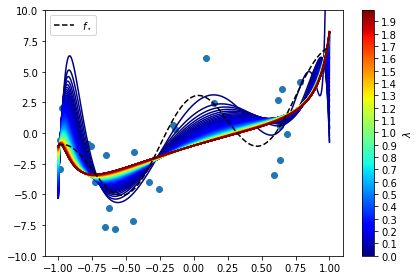

In [5]:
import matplotlib as mpl

lamb_range = np.arange(0.001, 2, 0.01) 

# get a colormap to represent the lambda values
c = np.arange(1, len(lamb_range) + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

p=50
mses = []
for ix, lamb in enumerate(lamb_range):
    Xp = polynomial_features(x, p=p) # generate feature matrix
    beta_hat = np.linalg.inv(Xp.T@Xp + lamb*np.eye(Xp.shape[1]))@Xp.T@y # get RR coefficients

    # make predictions on test samples to compare the fitted function
    Xp_test = polynomial_features(x_test, p=p)
    y_hat_test = Xp_test@beta_hat
    mses.append(np.mean((y_hat_test - f_star(x_test))**2))
    plt.plot(x_test, y_hat_test, c=cmap.to_rgba(ix + 1))

cbar = plt.colorbar(cmap, ticks=range(1,len(lamb_range)+1, 10), label="$\lambda$")
cbar.ax.set_yticklabels([round(l,2) for l in lamb_range[::10]])
plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.legend()
plt.ylim(-10,10)
plt.tight_layout()
plt.show()

As we can see from this plot, the solutions indeed become "simpler" as $\lambda$ gets bigger. We can also plot the errors (MSEs) as a function of $\lambda$ to see which value is theoretically best.

best value of lambda is 0.141


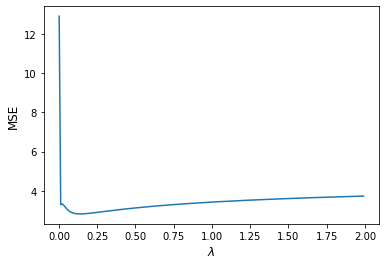

In [6]:
lamb_best = lamb_range[np.argmin(mses)]
print(f"best value of lambda is {lamb_best}")
plt.plot(lamb_range, mses)
plt.xlabel("$\lambda$", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.show()

In turns out that the best MSE in this case occurs at $\lambda \approx 0.14$. We also see that for $\lambda$ very small, the MSEs get significantly larger; in the limit, this corresponds exactly to the MSE of the MP solution. So, let's plot the MP solution versus the $\hat{\boldsymbol{\beta}}_{RR}(\lambda = 0.14)$ solution to see how they compare.

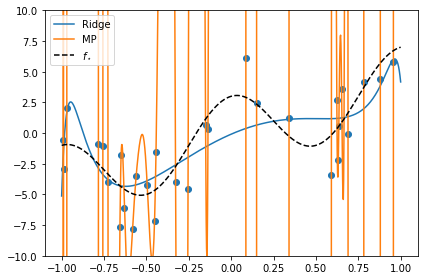

In [7]:
Xp = polynomial_features(x, p=p) # generate feature matrix
beta_hat_RR = np.linalg.inv(Xp.T@Xp + lamb_best*np.eye(Xp.shape[1]))@Xp.T@y # get RR coefficients
beta_hat_MP = np.linalg.pinv(Xp)@y
# make predictions on test samples to compare the fitted function
Xp_test = polynomial_features(x_test, p=p)
y_hat_test_RR = Xp_test@beta_hat_RR
y_hat_test_MP = Xp_test@beta_hat_MP

plt.scatter(x, y)
plt.plot(x_test, y_hat_test_RR, label="Ridge")
plt.plot(x_test, y_hat_test_MP, label="MP")
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.ylim(-10,10)
plt.legend()
plt.tight_layout()
plt.show()

As we can see, the MP solution performs completely different than the Ridge solution at $\lambda = 0.14$! It completely overfits the data, and does a very poor job of approximating the true regression function $f_\star$. We also observe another interesting point with the MP solution: it actually _perfectly_ predicts on each of the data points it was fit on. Indeed, it will always do this: when $p>n$, the Moore-Penrose pseudo-inverse is guaranteed to satisfy $\boldsymbol{X}\hat{\boldsymbol{\beta}}_{MP} = \boldsymbol{XX}^\dagger \boldsymbol{y} = \boldsymbol{y}$ (mathematically, this is because it will be a right inverse for the matrix $\boldsymbol{X}$). This phenomenon is referred to as "interpolation", which is sometimes conflated with the concept of overfitting. This is not always the case; in the homework, we will investigate a very interesting (and only recently understood) phenomenon called "double descent", in which performance actually _improves_ when we interpolate the data.

## Kernel ridge regression

So far, we've seen that the techniques from linear regression can be extended to non-linear function by fitting polynomials in one dimension. This general idea can be extended beyond polynomials and to multi-dimensional inputs. Consider for example when we have two features $\boldsymbol{x} = (x_1, x_2)\in \mathbb{R}^2$. Then one might define the feature map $\phi(\boldsymbol{x})= (1, x_1,x_2,x_1x_2, x_1^2, x_2^2)$ and fit the quadratic

$$
f(\boldsymbol{x}) = \beta_0 + \beta_1 x_1 + \beta_2x_2 + \beta_2x_1x_2 + \beta_4x_1^2 + \beta_5x_2^2 = \boldsymbol{\beta} \cdot \phi(\boldsymbol{x}).
$$

More generally, given features $\boldsymbol{x}\in \mathbb{R}^p$ and a feature map $\phi:\mathbb{R}^p \to \mathbb{R}^N$, we can always fit the model $f\boldsymbol{x}) = \boldsymbol{\beta}^\top \phi(\boldsymbol{x})$ using the usual techniques we have from linear regression.  Here we call $\mathbb{R}^N$ the _feature space_. 

To fit such a model to data $\boldsymbol{X}\in \mathbb{R}^{n\times p},\boldsymbol{y}\in \mathbb{R}^n$, we might hope to use our usual least-squares estimator 

$$
\hat{\boldsymbol{\beta}} = \arg\min_{\boldsymbol{\beta}in \mathbb{R}^N}\|\boldsymbol{y} - \phi(\boldsymbol{X})\boldsymbol{\beta}\|_2^2
$$

where here $\phi(\boldsymbol{X})\in \mathbb{R}^{n\times N}$ is the matrix whose $i$th row is $\phi(\boldsymbol{x}_i)\in \mathbb{R}^N$. Unfortunately, similar to what we saw with the polynomials, when $N > n$, the matrix $\phi(\boldsymbol{X})$ won't be full rank, and so we won't be able to  invert the matrix $\phi(\boldsymbol{X})^\top \phi(\boldsymbol{X})$ to find the least squares solution. In this case, a natural solution is to consider the regularized problem 

$$
\hat{\boldsymbol{\beta}}(\lambda) = \arg\min_{\boldsymbol{\beta}\in \mathbb{R}^N} \|\boldsymbol{y} - \phi(\boldsymbol{X})\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2.
$$

As we've seen, this will yield the solution

$$
\hat{\boldsymbol{\beta}}(\lambda) = (\phi(\boldsymbol{X})^\top \phi(\boldsymbol{X}) + \lambda \boldsymbol{I})^{-1}\phi(\boldsymbol{X})^\top \boldsymbol{y}
$$

which always exists. 

However, we now have another problem on our hands: we have to invert the matrix $\phi(\boldsymbol{X})^\top \phi(\boldsymbol{X}) + \lambda \boldsymbol{I}$, which can be very large when $N$ is big. Fortunately, there is a way to get around this problem, using something known as the _kernel trick_.

Given a feature map $\phi: \mathbb{R}^p \to \mathbb{R}^N$, define the associated kernel function $k: \mathbb{R}^p\times \mathbb{R}^p \to \mathbb{R}$ by

$$
k(\boldsymbol{x},\boldsymbol{x}') = \langle \phi(\boldsymbol{x}),\phi(\boldsymbol{x}')\rangle.
$$

**Example.** Consider the feature map $\phi(x_1,x_2) = (x_1^2, x_2^2, \sqrt{2}x_1x_2)$. Then 

$$
k(\boldsymbol{x},\boldsymbol{y}) = \langle \phi(\boldsymbol{x}), \phi(\boldsymbol{y})\rangle = x_1^2y_1^2 + x_2^2y_2^2 + 2x_1x_2y_1y_2 = (\boldsymbol{x} \cdot\boldsymbol{y})^2.
$$

The "kernel trick" is captured by the following fundamental result in kernel method, called the _representer theorem_. 

**Theorem (representer theorem)**. The function $\hat{f}(\boldsymbol{x}) = \hat{\boldsymbol{\beta}}^\top \phi(\boldsymbol{x})$ resulting from the optimization problem

$$
\hat{\boldsymbol{\beta}}(\lambda) = \arg\min_{\boldsymbol{\beta}\in \mathbb{R}^N} \|\boldsymbol{y} - \phi(\boldsymbol{X})\boldsymbol{\beta}\|_2^2 + \lambda \|\boldsymbol{\beta}\|_2^2
$$

is always of the form $\hat{f}(\boldsymbol{x}) = \sum_{i=1}^n \hat{\alpha}_i k(\boldsymbol{x},\boldsymbol{x}_i)$, where

$$
\hat{\boldsymbol{\alpha}}(\lambda) = (\boldsymbol{K} + \lambda\boldsymbol{I})^{-1}\boldsymbol{y}.
$$

This means we only need to work with the $n\times n$ matrix of dot products $\boldsymbol{K}$ (which is called the Gram matrix, or the kernel matrix), which is much more efficient than working with the $N\times N$ matrix $\phi(\boldsymbol{X})^\top \phi(\boldsymbol{X})$ when $N \gg n$. Now that we've found $\hat{\boldsymbol{\alpha}}$, we can get our fitted model

$$
\hat{f}(\boldsymbol{x}) = \sum_{i=1}^n \hat{\alpha}_i k(\boldsymbol{x},\boldsymbol{x}_i).
$$

Note that this means we can fit models with features maps $\phi$ _without ever having to work with feature map itself_. Instead, we just need access to the kernel function $k$. This is known as the kernel trick, because in many situations the kernel function $k$ may be simple even when the feature map $\phi$ is very high dimensional, and intractable to work with in practice. The general method of working with a kernel $k$ rather than explicitly with a feature map $\phi$ is called the "kernel trick", and the specific method for regression presented here is called _kernel ridge regression_. Kernel ridge regression allows us to fit a very broad set of different functions using essentially the exact same tools as linear ridge regression.

Let's see a real-world example. The `EGFR_bioactivity` dataset contains bioactivity data for $n = 2000$ different drugs, each represented by a molecular "fingerprints", which here is a binary vector of length $p = 512$ indicating in each dimension whether the molecule contains a particular substructure or not. The response `y` is a measurement of how active each drug is against a particular protein (called EGFR) that it is targeting. The goal with this dataset is to build a model to predict this bioactivity from the features of the molecules. We load the dataset below.

In [8]:
import pickle 

with open('datasets/EGFR_bioactivity.pkl', 'rb') as f:
    data = pickle.load(f)
    
X = data["X"]
y = data["y"]
X.shape, y.shape

((2000, 512), (2000,))

To fit a kernel ridge regression model to this data, we first need to choose a kernel function $k$. For molecular fingerprints, a choice that is commonly made is the Jaccard kernel, which for two binary vectors $\boldsymbol{x},\boldsymbol{x}'$ is given by 

$$
k_{Jaccard}(\boldsymbol{x},\boldsymbol{x}') = \frac{\boldsymbol{x}\cdot \boldsymbol{x}'}{\|\boldsymbol{x}\|^2_2 +\|\boldsymbol{x}'\|_2^2 - \boldsymbol{x}\cdot\boldsymbol{x}' }
$$

For comparison, we will also use the linear kernel

$$
k_{linear}(\boldsymbol{x}, \boldsymbol{x}') = \boldsymbol{x}\cdot \boldsymbol{x}',
$$

which corresponds to doing usual linear ridge regression.

Let's define a couple python functions that can compute these kernel for us. (These functions are designed to compute the entire kernel matrix, not just the value for single pair $\boldsymbol{x},\boldsymbol{x}'$.)

In [9]:
def k_jaccard(X, Y=None):
    if Y is None:
        Y = X
    prod = np.dot(X, Y.T)
    norm_X = (np.linalg.norm(X, axis=1)**2).reshape(-1,1)
    norm_Y = (np.linalg.norm(Y, axis=1)**2).reshape(-1,1)
    return prod / (norm_X + norm_Y.T - prod)

def k_linear(X, Y=None):
    if Y is None:
        Y = X
    return np.dot(X, Y.T)

To fit the parameter $\lambda$, we will need to split the data into two subsets: 1800 points are used for fitting the models, and 200 are used as a validation set to estimate the MSE for various values of the regularization parameter $\lambda$. We do this split below.

In [10]:
train_ix = np.random.choice(X.shape[0], 1800, replace=False)
test_ix = [j for j in range(X.shape[0]) if j not in train_ix]
X_train, y_train = X[train_ix], y[train_ix]
X_test, y_test = X[test_ix], y[test_ix]

Let's also define a function to fit the kernel ridge regression model.

In [11]:
def fit_krr(K, y, lamb):
    return np.linalg.inv(K+lamb*np.eye(K.shape[0]))@y

Now we can fit the models across a range of $\lambda$ values.

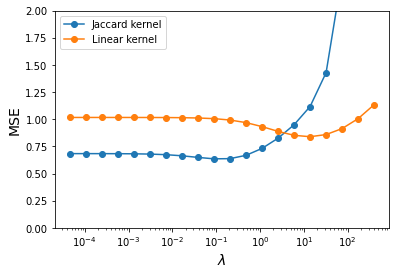

In [12]:
lamb_range = np.exp(np.linspace(-10,6,20))

K_jaccard_train = k_jaccard(X_train)
K_jaccard_test = k_jaccard(X_test, X_train)
K_linear_train = k_linear(X_train)
K_linear_test = k_linear(X_test, X_train)
mses_jaccard = []
mses_linear = []

for lamb in lamb_range:
    alpha_hat_jaccard = fit_krr(K_jaccard_train, y_train, lamb)
    alpha_hat_linear = fit_krr(K_linear_train, y_train, lamb)
    y_hat_jaccard = K_jaccard_test@alpha_hat_jaccard 
    y_hat_linear = K_linear_test@alpha_hat_linear
    mses_jaccard.append(np.mean((y_test-y_hat_jaccard)**2))
    mses_linear.append(np.mean((y_test-y_hat_linear)**2))

plt.plot(lamb_range, mses_jaccard, label="Jaccard kernel", marker='o')
plt.plot(lamb_range, mses_linear, label="Linear kernel", marker='o')
plt.legend()
plt.ylabel("MSE", fontsize=14)
plt.xlabel("$\lambda$", fontsize=14)
plt.xscale("log")
plt.ylim(0,2)
plt.show()

Interestingly, the optimal value of $\lambda$ for the linear kernel (i.e. normal ridge regression) is almost two orders of magnitude higher than that for the model using the Jaccard kernel. Moreover, the Jaccard model attains lower MSE on the validation set. This is but one example of when using a kernel that's not linear can improve performance in function estimation.

Before concluding this section, it is important to note a few cautions in fitting nonlinear models. First, a nonlinear model is not _always_ better. In particular, as we've seen in many examples throughout this workbook, there are many real world datasets for which a linear model _is_ appropriate. Second, a downside to working with a nonlinear model is that we lose a great deal of interpretability. In linear regression, the coefficients are easily interpretable: $\hat{\beta}_j$ corresponds to the margin effect on the response of a unit change in feature $j$. This makes performing e.g. hypothesis tests natural. With complicated nonlinearities, we can no longer make such interpretations, which make performing statistical influence less meaningful. Nevertheless, when the priority is function approximation, nonlinear regression methods like kernel ridge regression can be effective tools.  

## Appendix: choosing kernels

An important choice that we need to make when using kernel ridge regression is to pick the kernel function $k$. Here we will see a few examples of kernels. Typically, we interpret kernels as measures of similarity.

Perhaps the most commonly used kernel is the **Gaussian RBF kernel**:

$$
k(\boldsymbol{x},\boldsymbol{x}') = \exp(-\gamma \|\boldsymbol{x}-\boldsymbol{x}'\|_2^2)
$$

where $\gamma>0$ is a _bandwidth_ parameter that is chosen by the user. Larger $\gamma$ corresponds to "localizing" more around individual points, since the similarity decays quickly as $\|\boldsymbol{x}-\boldsymbol{x}'\|_2^2$ grows. On the other hand, smaller $\gamma$ makes the similarity decay more slowly as $\|\boldsymbol{x}-\boldsymbol{x}'\|_2^2$ grows. In practice, we tend to choose the parameter $\gamma$ using cross validation.

Another kernel that one might use is the **Laplace kernel**:

$$
k(\boldsymbol{x},\boldsymbol{x}') = \exp(-\gamma \|\boldsymbol{x}-\boldsymbol{x}'\|_1)
$$

We could also use **polynomial kernels**:

$$
k(\boldsymbol{x},\boldsymbol{x}') = (\gamma \langle \boldsymbol{x}, \boldsymbol{x}'\rangle + 1)^p
$$

Here the degree $p$ also needs to be chosen by the user.